In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Get the data
* Identify the "right" data set(s) for the problem you have defined
* Import data and set up local or remote data structure
* Determine most appropriate tools to work with data

Data downloaded from https://data.gov.sg/dataset/resale-flat-prices 

In [2]:
resale_prices = pd.read_csv('data/hdb/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv')

### Explore the data
* Read any documentation provided with the data
* Perform exploratory data analysis
* Verify the quality of the data

In [3]:
resale_prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [4]:
resale_prices.isnull().values.any()

False

In [5]:
resale_prices.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
count,59809.000000,59809.000000,59809.000000,5.980900e+04
mean,97.319194,1991.607200,74.017890,4.394339e+05
std,24.166368,11.283492,11.274598,1.415803e+05
min,31.000000,1966.000000,47.000000,9.050000e+04
25%,75.000000,1984.000000,66.000000,3.400000e+05
50%,96.000000,1989.000000,72.000000,4.100000e+05
75%,111.000000,2001.000000,83.000000,5.000000e+05
max,280.000000,2015.000000,97.000000,1.180000e+06


In [6]:
resale_prices.count()

month                  59809
town                   59809
flat_type              59809
block                  59809
street_name            59809
storey_range           59809
floor_area_sqm         59809
flat_model             59809
lease_commence_date    59809
remaining_lease        59809
resale_price           59809
dtype: int64

In [7]:
resale_prices.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease          int64
resale_price           float64
dtype: object

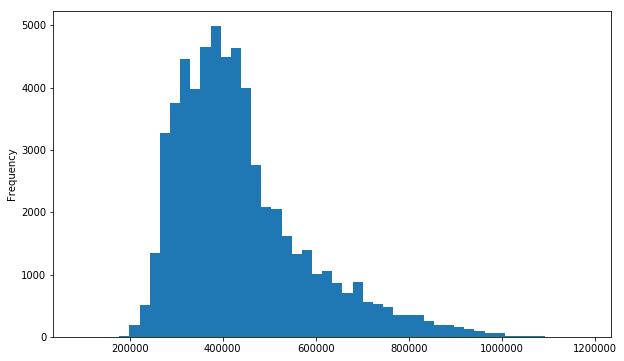

In [8]:
resale_prices['resale_price'].plot(kind="hist", bins=50, figsize=(10,6))

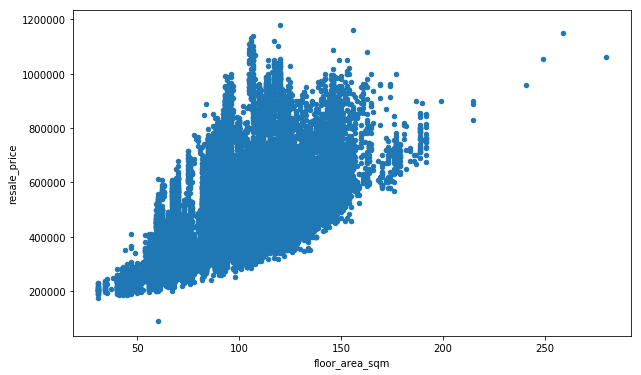

In [9]:
resale_prices.plot('floor_area_sqm', 'resale_price', kind="scatter", figsize=(10,6))

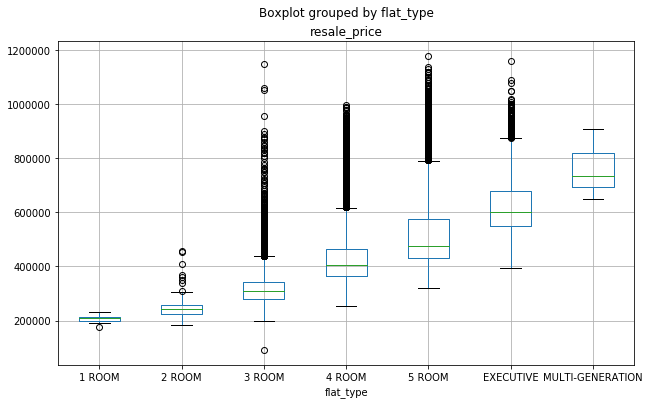

In [10]:
resale_prices.boxplot("resale_price", "flat_type", figsize=(10,6))

### Model the Data
* Create necessary derived columns from the data (new data)
* Select appropriate model
* Build model
* Evaluate and refine model

In [11]:
resale_prices = resale_prices.rename(columns={'month': 'year-month'})
resale_prices['year'] = resale_prices['year-month'].apply(lambda x: int(x.split("-")[0]))
resale_prices['month'] = resale_prices['year-month'].apply(lambda x: int(x.split("-")[1]))
resale_prices['lower_storey_range'] = resale_prices['storey_range'].apply(lambda x: int(x.split()[0]))
resale_prices['upper_storey_range'] = resale_prices['storey_range'].apply(lambda x: int(x.split()[2]))

In [12]:
df_flat_type = pd.get_dummies(resale_prices['flat_type'])
resale_prices = pd.concat([resale_prices, df_flat_type], axis=1)

In [13]:
resale_prices.head()

,year-month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,month,lower_storey_range,upper_storey_range,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI-GENERATION
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,...,1,7,9,0,0,1,0,0,0,0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,...,1,1,3,0,0,1,0,0,0,0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,...,1,1,3,0,0,1,0,0,0,0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,...,1,1,3,0,0,1,0,0,0,0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,...,1,7,9,0,0,1,0,0,0,0


In [14]:
train_test_split_ratio = 0.7
num_records = resale_prices.shape[0]
split_index = int(num_records*train_test_split_ratio)
resale_train = resale_prices[:split_index]
resale_test = resale_prices[split_index:]

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [16]:
factors = ["floor_area_sqm", "upper_storey_range", "remaining_lease", "1 ROOM", "2 ROOM", "3 ROOM",
                       "4 ROOM", "5 ROOM", "EXECUTIVE", "MULTI-GENERATION"]

In [17]:
reg = linear_model.LinearRegression()
reg.fit(resale_train[factors], resale_train["resale_price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
train_rmse = mean_squared_error(resale_train["resale_price"], 
                          reg.predict(resale_train[factors]))**0.5
test_rmse = mean_squared_error(resale_test["resale_price"], 
                          reg.predict(resale_test[factors]))**0.5
print("Train RMSE: {}".format(train_rmse))
print("Test RMSE: {}".format(test_rmse))

Train RMSE: 91428.75090177791
Test RMSE: 102976.87624708698


In [19]:
dict(zip(reg.coef_, factors))

{-68106.51653962789: '2 ROOM',
 -49257.00525371623: '3 ROOM',
 -44477.77324618621: '1 ROOM',
 -23550.883636332794: '4 ROOM',
 -4121.620863627078: '5 ROOM',
 318.1501301122039: 'remaining_lease',
 2576.9461983990786: 'floor_area_sqm',
 8547.42184770451: 'upper_storey_range',
 49596.25316283978: 'EXECUTIVE',
 139917.54637664836: 'MULTI-GENERATION'}

In [20]:
reg.intercept_

106162.3815920531